<Figure size 432x288 with 0 Axes>

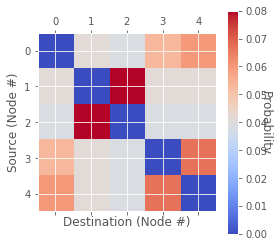

[[0.      0.04125 0.03875 0.05328 0.05976]
 [0.04125 0.      0.08    0.04125 0.04125]
 [0.03875 0.08    0.      0.03875 0.03875]
 [0.05328 0.04125 0.03875 0.      0.06696]
 [0.05976 0.04125 0.03875 0.06696 0.     ]]


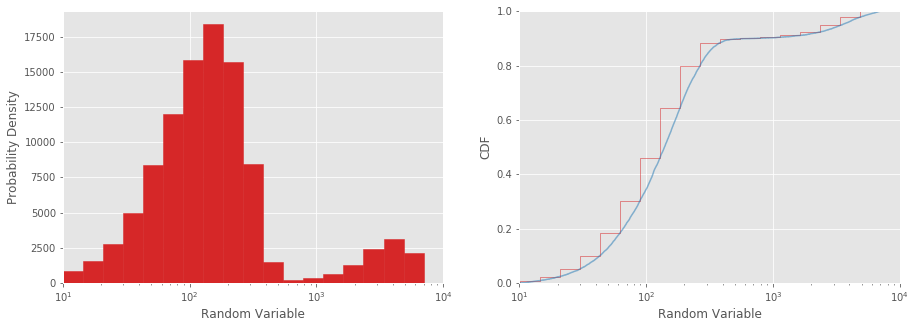

In [2]:
import trafpy.generator as tpg
import config

endpoints = ['server_'+str(i) for i in range(5)]
node_dist,fig = tpg.gen_multimodal_node_dist(eps=endpoints,skewed_nodes=['server_1','server_2'],show_fig=True)
print(node_dist)
prob_dist, rand_vars, fig = tpg.gen_multimodal_val_dist(min_val=10,max_val=7000,locations=[20,4000],skews=[6,-1],scales=[150,1500],num_skew_samples=[10000,650],bg_factor=0.05,return_data=True,show_fig=True,logscale=True,xlim=[10,10000],occurrence_multiplier=10,num_bins=18)

## Node Distributions

In [ ]:
_ = tpg.gen_uniform_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)
_ = tpg.gen_uniform_multinomial_exp_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)
_ = tpg.gen_multimodal_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)
_ = tpg.gen_multimodal_node_pair_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)

## Value Distributions

In [ ]:
_ = tpg.gen_uniform_val_dist(min_val=0,
                             max_val=100,
                             round_to_nearest=1,
                             show_fig=True,
                             print_data=False,
                             num_bins=101)

_ = tpg.gen_multimodal_val_dist(min_val=10,
                               max_val=7000,
                               locations=[20,4000],
                               skews=[6,-1],
                               scales=[150,1500],
                               num_skew_samples=[10000,650],
                               bg_factor=0.05,
                               show_fig=True,
                               print_data=False,
                               logscale=True,
                               xlim=[10,10000],
                               num_bins=18)

_ = tpg.gen_named_val_dist(dist='weibull',
                          params={'_alpha': 1.4, '_lambda': 7000},
                          show_fig=True,
                          print_data=False,
                          logscale=True,
                          xlim=[1e2,1e11])

## Generating Job-Centric Demand Data

In [ ]:
node_dist = tpg.gen_uniform_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=False)

flow_size_dist = tpg.gen_multimodal_val_dist(config.MIN_FLOW_SIZE,
                                            config.MAX_FLOW_SIZE,
                                            locations=[50],
                                            skews=[0],
                                            scales=[10],
                                            num_skew_samples=[10000],
                                            bg_factor=0,
                                            round_to_nearest=1,
                                            show_fig=True,
                                            num_bins=34,
                                            print_data=False)

interarrival_time_dist = tpg.gen_multimodal_val_dist(config.MIN_INTERARRIVAL,
                                                    config.MAX_INTERARRIVAL,
                                                    locations=[1, 1, 3000, 1, 1800000, 10000000],
                                                    skews=[0, 100, -10, 10, 50, 6],
                                                    scales=[0.1, 62, 2000, 7500, 3500000, 20000000],
                                                    num_skew_samples=[800, 1000, 2000, 4000, 4000, 3000],
                                                    bg_factor=0.025,
                                                    round_to_nearest=1,
                                                    show_fig=True,
                                                    print_data=False)

num_ops_dist = tpg.gen_multimodal_val_dist(config.MIN_NUM_OPS,
                                          config.MAX_NUM_OPS,
                                          locations=[100],
                                          skews=[0.05],
                                          scales=[50],
                                          num_skew_samples=[10000],
                                          bg_factor=0.05,
                                          round_to_nearest=1,
                                          show_fig=True,
                                          print_data=False)


job_centric_demand_data = tpg.create_demand_data(num_demands=config.NUM_DEMANDS,
                                                eps=config.ENDPOINT_LABELS,
                                                node_dist=node_dist,
                                                flow_size_dist=flow_size_dist,
                                                interarrival_time_dist=interarrival_time_dist,
                                                num_ops_dist=num_ops_dist,
                                                c=config.C,
                                                use_multiprocessing=False,
                                                print_data=True)
print('Job data:\n{}'.format(job_centric_demand_data))

## Generating Flow-Centric Demand Data

In [ ]:
node_dist = tpg.gen_uniform_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=False)

flow_size_dist = tpg.gen_named_val_dist(dist='weibull',
                                       params={'_alpha': 1.4, '_lambda': 7000},
                                       show_fig=True,
                                       print_data=False,
                                       logscale=True,
                                       round_to_nearest=1,
                                       xlim=[1e2,1e12])

interarrival_time_dist = tpg.gen_named_val_dist(dist='lognormal',
                                               params={'_mu': 7.4, '_sigma': 2},
                                               show_fig=True,
                                               print_data=False,
                                               logscale=True,
                                               xlim=[1e1,1e6])


flow_centric_demand_data = tpg.create_demand_data(num_demands=config.NUM_DEMANDS,
                                                 eps=config.ENDPOINT_LABELS,
                                                 node_dist=node_dist,
                                                 flow_size_dist=flow_size_dist,
                                                 interarrival_time_dist=interarrival_time_dist,
                                                 print_data=True)
print('Flow data:\n{}'.format(flow_centric_demand_data))

## Organise into Slots Dict

In [ ]:
# DO THIS INTERNALLY IN DEMAND OBJECT WHEN PASS DEMAND INTO ENV

# slot_size = 100000

# job_centric_slot_dict = tpg.construct_demand_slots_dict(demand_data=job_centric_demand_data,
#                                                        slot_size=slot_size)
# # print('\n\nJob slot dict:\n{}'.format(job_centric_slot_dict))


# flow_centric_slot_dict = tpg.construct_demand_slots_dict(demand_data=flow_centric_demand_data,
#                                                         slot_size=slot_size)
# # print('\n\nFlow slot dict:\n{}'.format(flow_centric_slot_dict))


## Save Demand Data

In [ ]:
tpg.pickle_data(data=flow_centric_demand_data,
               path_to_save='data/flow_centric_demand_data.pickle',
               overwrite=True,
               zip_data=True)

tpg.pickle_data(path_to_save='data/job_centric_demand_data.pickle',
               data=job_centric_demand_data,
               overwrite=True,
               zip_data=True)

## Load Demand Data

In [ ]:
flow_centric_demand_data = tpg.unpickle_data(path_to_load='data/flow_centric_demand_data.pickle',
                                             zip_data=True)
job_centric_demand_data = tpg.unpickle_data(path_to_load='data/job_centric_demand_data.pickle',
                                             zip_data=True)

## Plot Demand Data

In [ ]:
import trafpy.generator as tpg
import config

job_centric_demand_data = tpg.unpickle_data(path_to_load='data/job_centric_demand_data.pickle',
                                            zip_data=True)


dep_stats = tpg.get_job_demand_data_dependency_stats(job_centric_demand_data)

# get dependency stats
flow_sizes = []
for job_id in dep_stats.keys():
    for dep in dep_stats[job_id]:
        if dep['attr_dict']['dependency_type'] == 'data_dep' and dep['attr_dict']['flow_size'] != 0:
            flow_sizes.append(dep['attr_dict']['flow_size'])
# get job stats
num_ops = []
num_edges = []
for idx in range(len(job_centric_demand_data['job_id'])):
    establish = job_centric_demand_data['establish'][idx]
    if establish == 0:
        # take down, ignore
        pass
    else:
        # connection
        job = job_centric_demand_data['job'][idx]
        num_ops.append(job.number_of_nodes())
        num_edges.append(job.number_of_edges())
# use multiprocessing for graph diameters
diameters = tpg.calc_graph_diameters(job_centric_demand_data['job'],multiprocessing_type='pool')

# plot
_ = tpg.draw_job_graphs(job_centric_demand_data,show_fig=True)
_ = tpg.plot_val_dist(flow_sizes, 
                      show_fig=True,
                      rand_var_name='Flow Sizes',
                      num_bins=0)
_ = tpg.plot_val_dist(num_ops, 
                      show_fig=True,
                      rand_var_name='Num Ops',
                      num_bins=10)
_ = tpg.plot_val_dist(num_edges, 
                      show_fig=True,
                      rand_var_name='Num Edges',
                      num_bins=10)
_ = tpg.plot_val_dist(diameters, 
                      show_fig=True,
                      rand_var_name='Diameters',
                      num_bins=10)



# problem: last 2 bins/hists being combined into single bar so get peak and get one bar removed

## Creating Manager Objects & Running Simulation

In [ ]:
import trafpy.generator as tpg
from trafpy.manager import Demand, RWA, SRPT, DCN
import config

In [ ]:
# load demand data
demand_data = tpg.unpickle_data(path_to_load='data/job_centric_demand_data.pickle',
                                zip_data=True)

# init manager
network = tpg.gen_simple_network(ep_label=config.ENDPOINT_LABEL,num_channels=config.NUM_CHANNELS)
demand = Demand(demand_data=demand_data)
rwa = RWA(tpg.gen_channel_names(config.NUM_CHANNELS), config.NUM_K_PATHS)
scheduler = SRPT(network, rwa, slot_size=config.SLOT_SIZE)
env = DCN(network, demand, scheduler, slot_size=config.SLOT_SIZE, max_flows=config.MAX_FLOWS, max_time=config.MAX_TIME)

In [ ]:
# run simulation
for episode in range(config.NUM_EPISODES):
    print('\nEpisode {}/{}'.format(episode+1,config.NUM_EPISODES))
    observation = env.reset(config.LOAD_DEMANDS)
    while True:
        print('Time: {}'.format(env.curr_time))
        action = scheduler.get_action(observation)
        print('Action:\n{}'.format(action))
        observation, reward, done, info = env.step(action)
        if done:
            print('Episode finished.')
            env.get_scheduling_session_summary(print_summary=True)
            break

In [ ]:
network = tpg.gen_simple_network(ep_label='server', show_fig=True)